In [1]:
## import safepy package
from safepy import safe
%matplotlib inline

In [2]:
## Parameters
path_to_safe_data='../../safe-data/' #path to the cloned safe-data repository (https://github.com/baryshnikova-lab/safe-data.git)

# Annotating your own network with Gene Ontology

In [3]:
## initialize the safe object
sf = safe.SAFE(path_to_safe_data=path_to_safe_data)

### Load and display the network

In [4]:
# Option 1: Tab-delimited 3-column format (node1 label - node2 label - edge weight). 
# The node labels will be used as keys to map nodes to attributes and therefore have to match the node identifiers in the attribute file.

# sf.load_network(network_file='networks/Costanzo_Science_2010_3col.txt')

In [5]:
# Option 2: Tab-delimited 5-column format (node1 label - node1 key - node2 label - node2 key - edge weight).
# Here, the node keys (e.g., systematic gene names) are provided in addition to the node labels (e.g., common gene names).
## load network
sf.load_network(network_file='networks/Costanzo_Science_2010_5col.txt')

In [6]:
# # Option 3: Cytoscape session file (CYS)
# sf.load_network(network_file='networks/Costanzo_Science_2016.cys',
#                node_key_attribute='ORF')

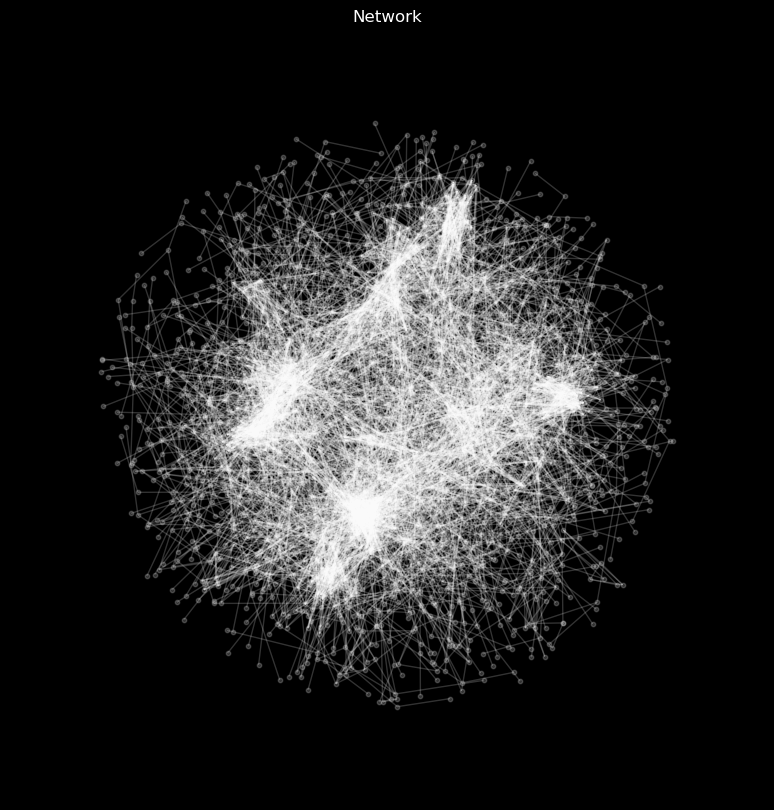

In [7]:
## plot network
ax=sf.plot_network()

### Load the attributes

Here we are using a Gene Ontology (GO) biological process dataset as a set of attributes. These data, just like any other attribute file, needs to be provided in matrix format (genes as rows; GO terms as columns; 1/0 values for each gene annotated/not annotated to a GO term).

This GO matrix can be generated from the GO tree (go-basic.obo file available at http://geneontology.org/docs/download-ontology/) and the species-specific gene-to-GO term annotation file (a gaf file available at http://current.geneontology.org/products/pages/downloads.html) using a script provided in `safepy/utils/make_go.py`.

For more detailed format specifications, check the example attribute file. The main format requirements are:
* the first column contains the node labels (in this case, yeast ORFs)
* each column is an attribute
* the row labels in the attribute file should be matching the node keys in the network.



In [8]:
sf.load_attributes(attribute_file='attributes/go_bp_140819.txt.gz')

### Define the local neighborhoods and compute their enrichment for each attribute

In [9]:
# sf.define_neighborhoods()

In [10]:
# Explicitly define the node_distance metric and the neighborhood radius
sf.define_neighborhoods(node_distance_metric='shortpath_weighted_layout', neighborhood_radius=0.15)

In [11]:
sf.compute_pvalues(multiple_testing=False)

### Plot the enrichment landscapes of a sample of attributes

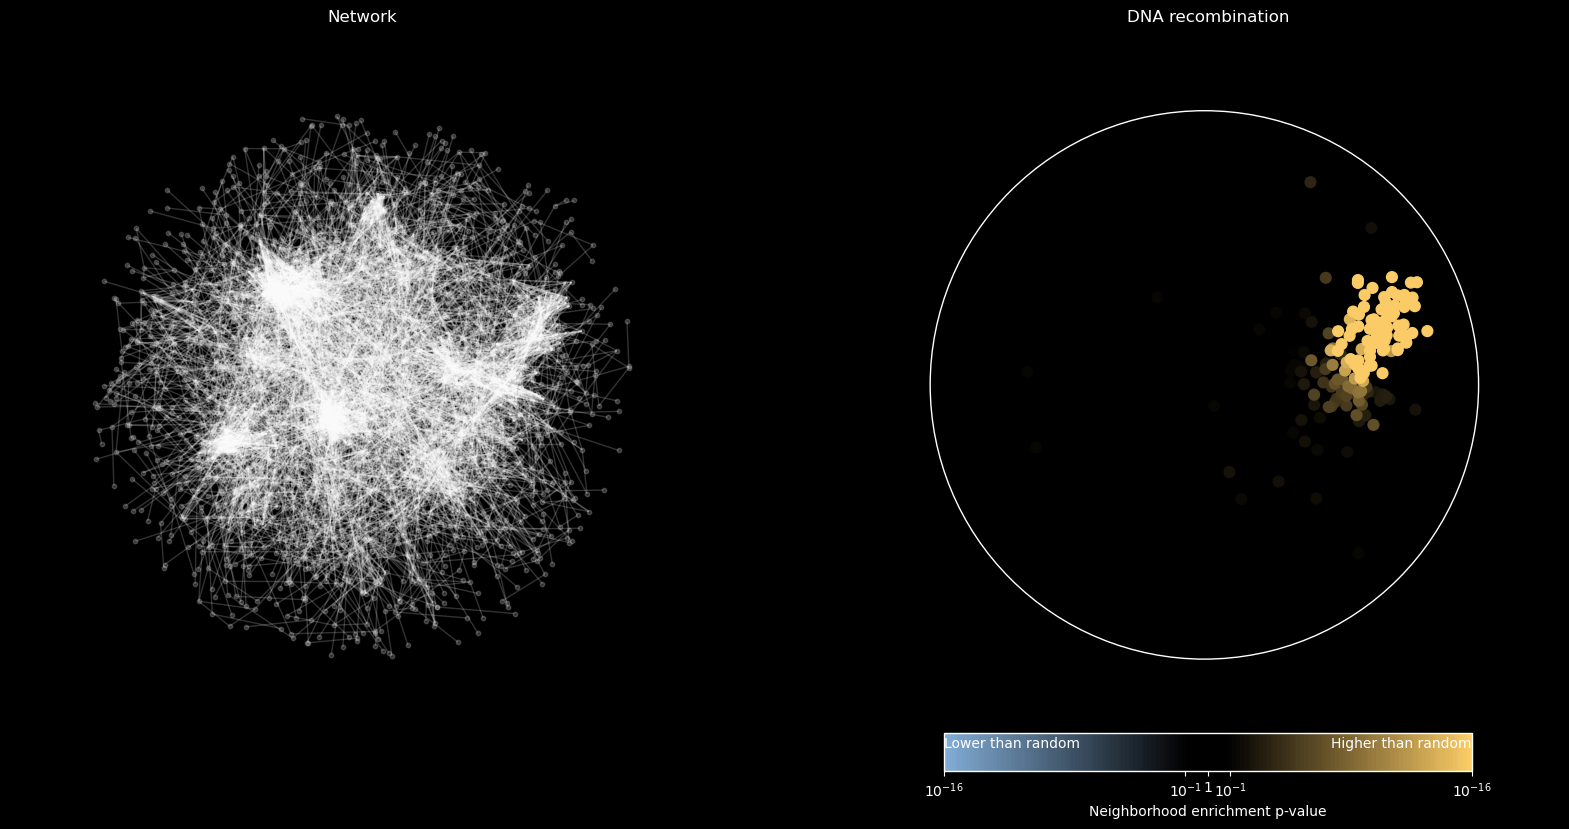

In [12]:
sf.plot_sample_attributes(attributes=['DNA recombination'], vmin=-16, vmax=16)

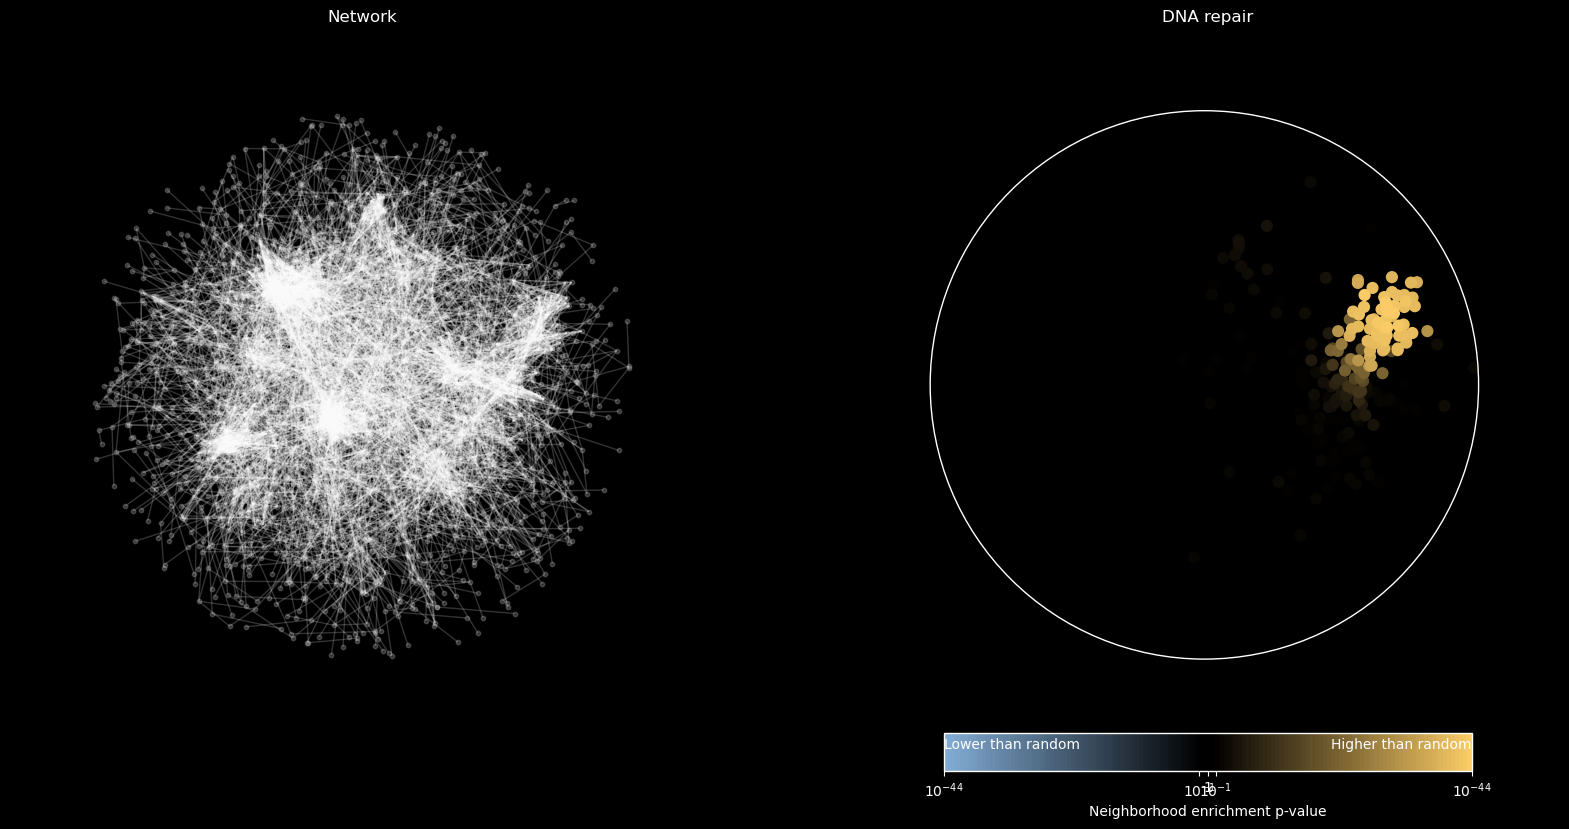

In [13]:
# Just the enrichment itself with min and max boundaries on the colormap
sf.plot_sample_attributes(attributes=['DNA repair'])

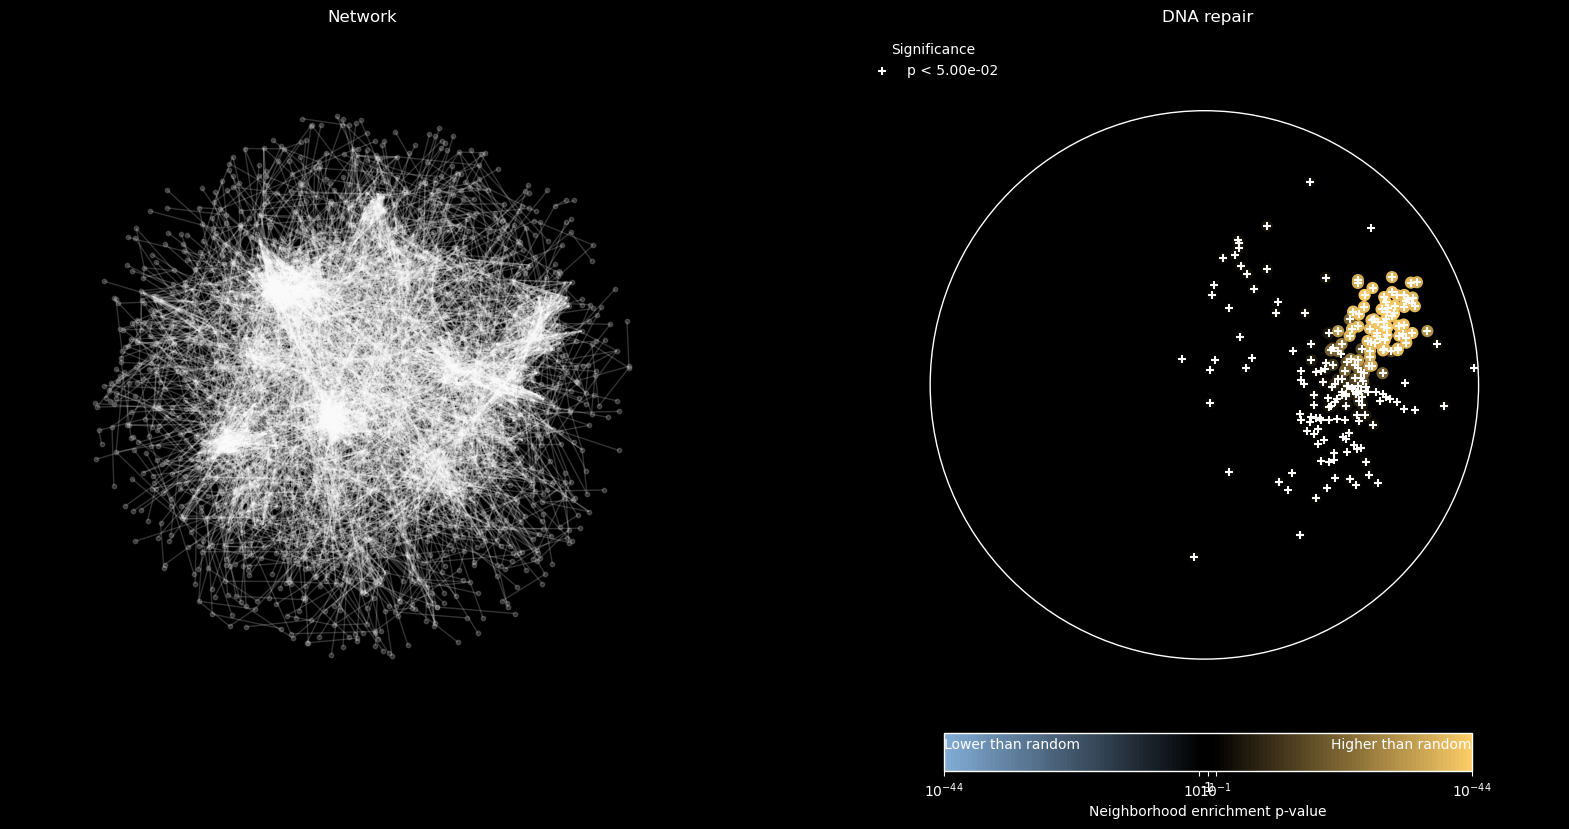

In [14]:
# Show the neighborhoods that are significant (p < 0.05)
sf.plot_sample_attributes(attributes=['DNA repair'], show_significant_nodes=True)

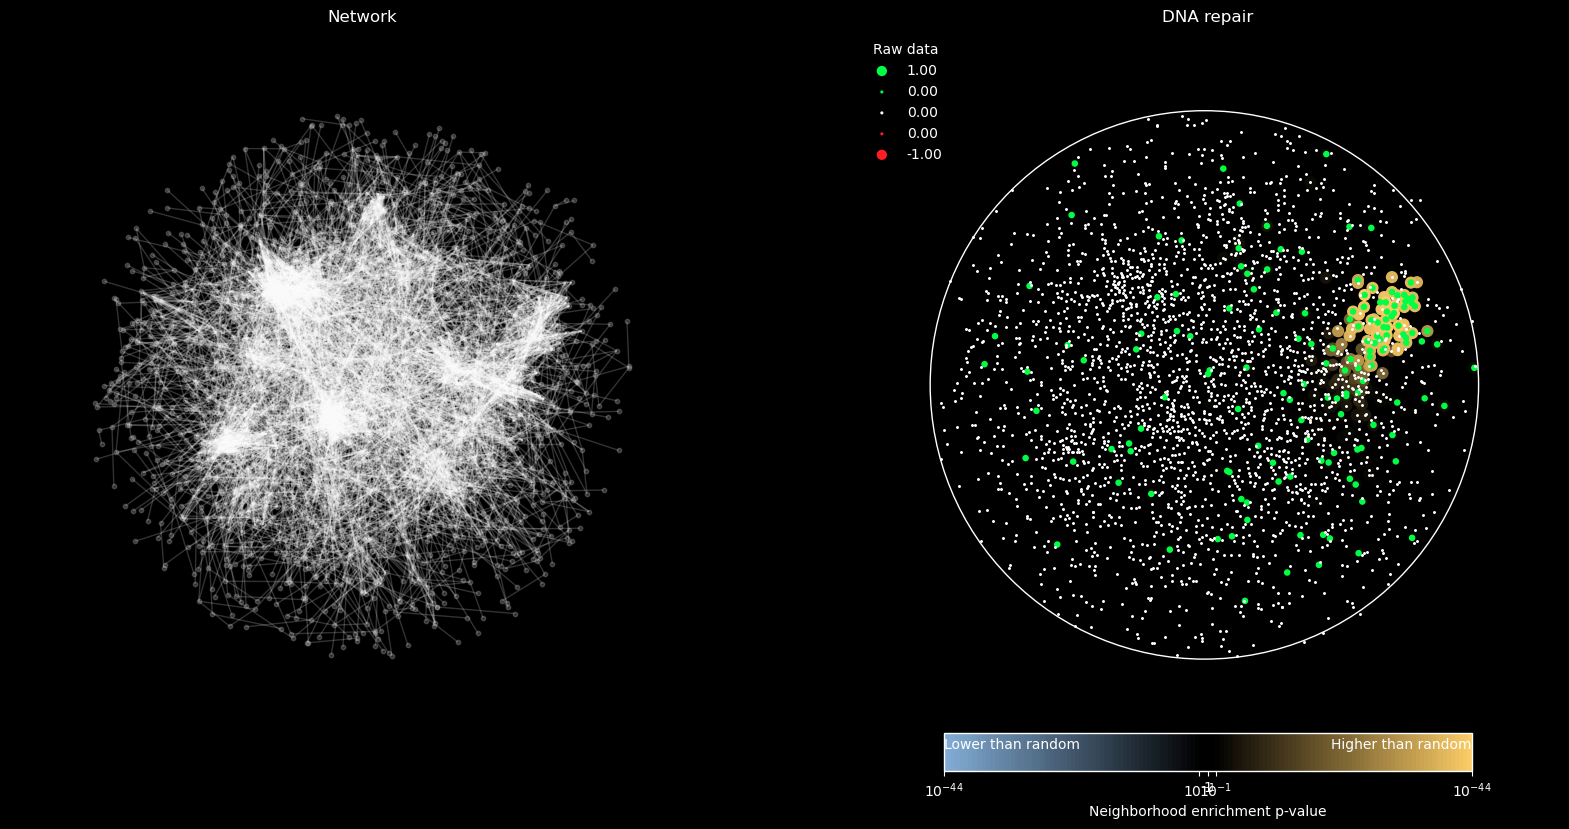

In [15]:
# Show the raw data (nodes annotated to this attribute)
sf.plot_sample_attributes(attributes=['DNA repair'], show_raw_data=True)

### Combine the enrichment landscapes into a single composite map

In [16]:
sf.define_top_attributes()

In [17]:
sf.define_domains(attribute_distance_threshold = 0.65)

/mnt/d/Documents/code/forks/safepy/safepy/safe.py:669: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  self.node2domain['primary_nes'] = o.lookup(i.index, i.values)


In [18]:
sf.trim_domains()

/mnt/d/Documents/code/forks/safepy/safepy/safe.py:837: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  node2all_domains_count = node2domain_count.sum(axis=1)[:, np.newaxis]


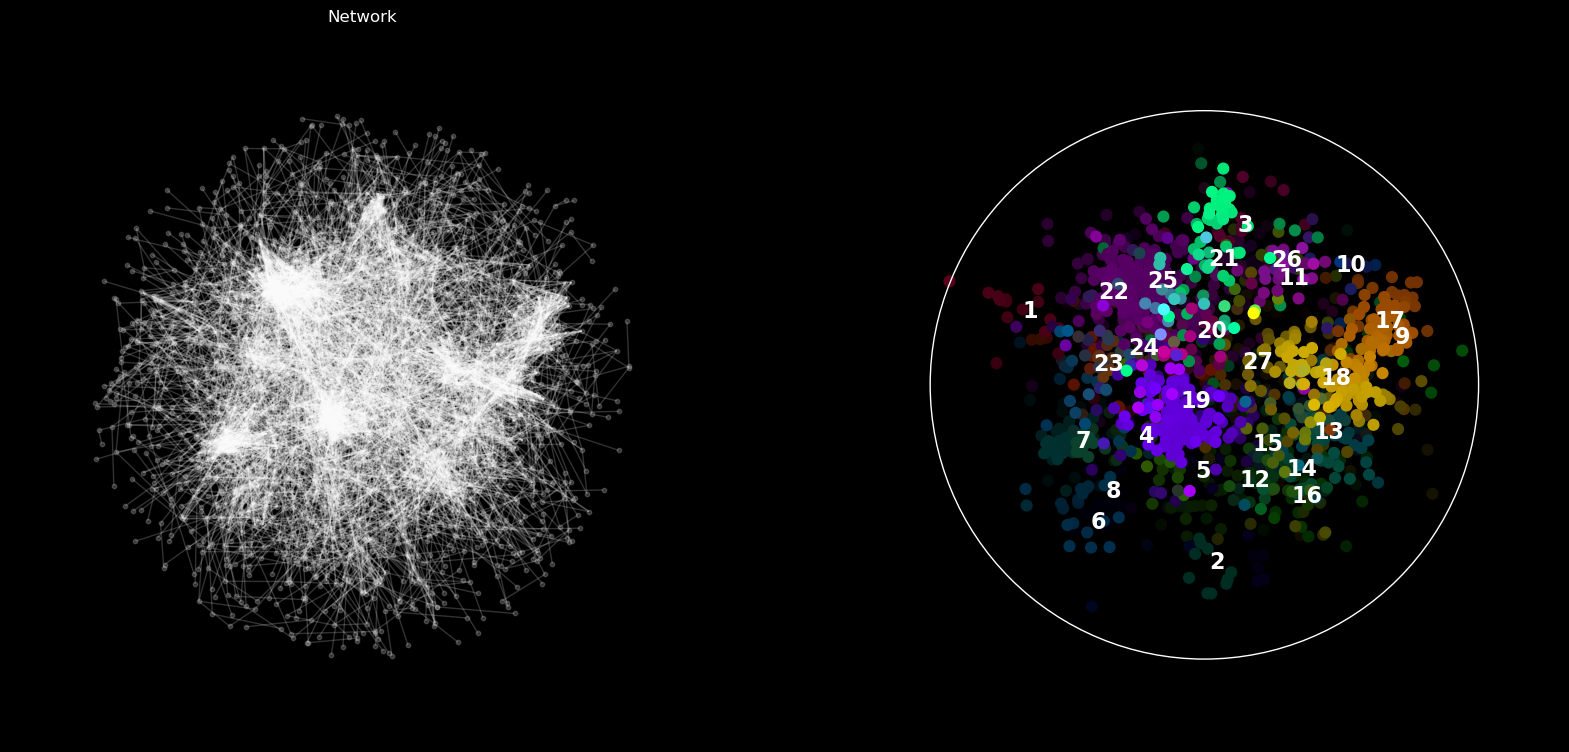

In [19]:
sf.plot_composite_network(show_each_domain=False)

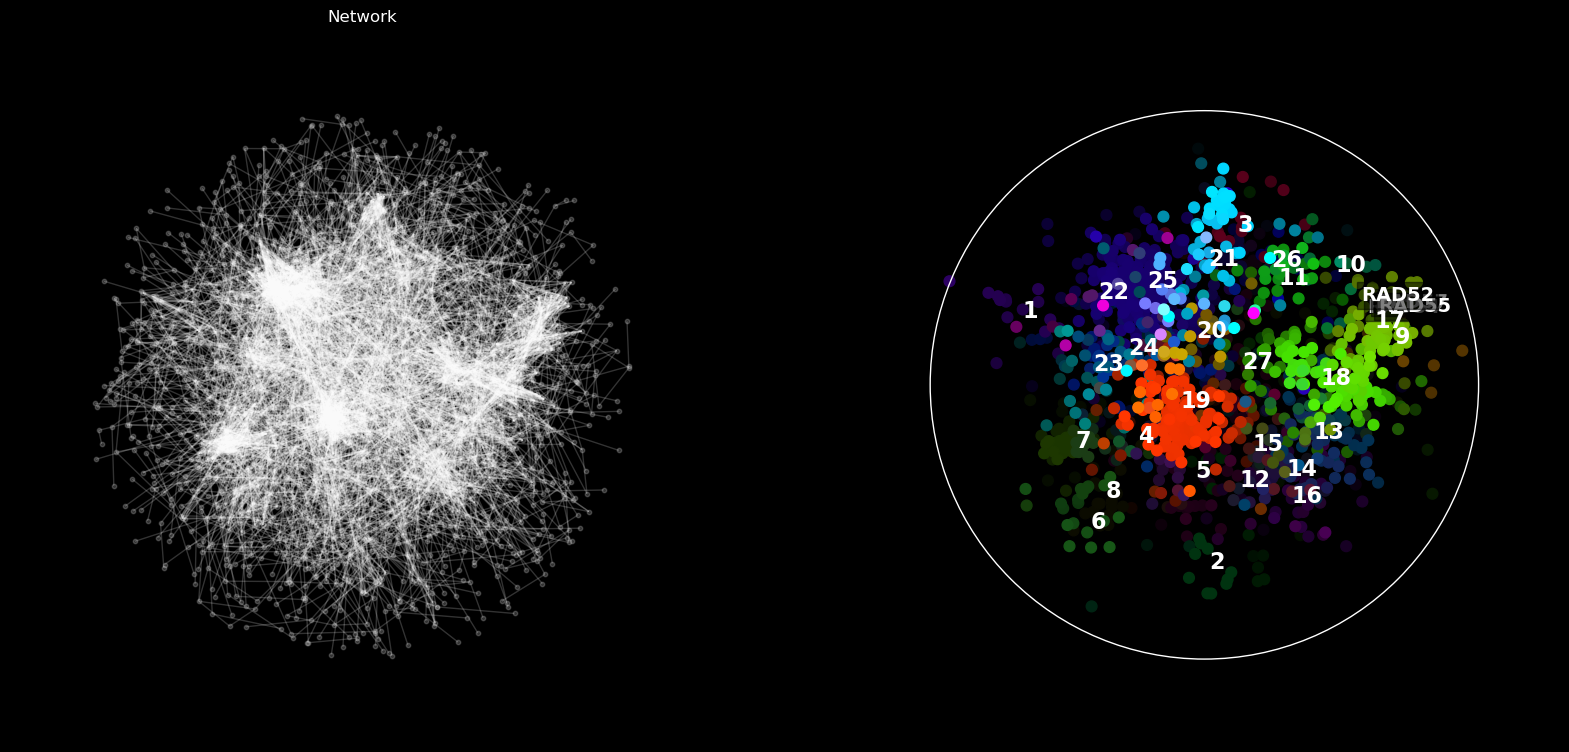

In [20]:
sf.plot_composite_network(show_each_domain=False, labels=['RAD54','RAD57','RAD55','RAD52'])

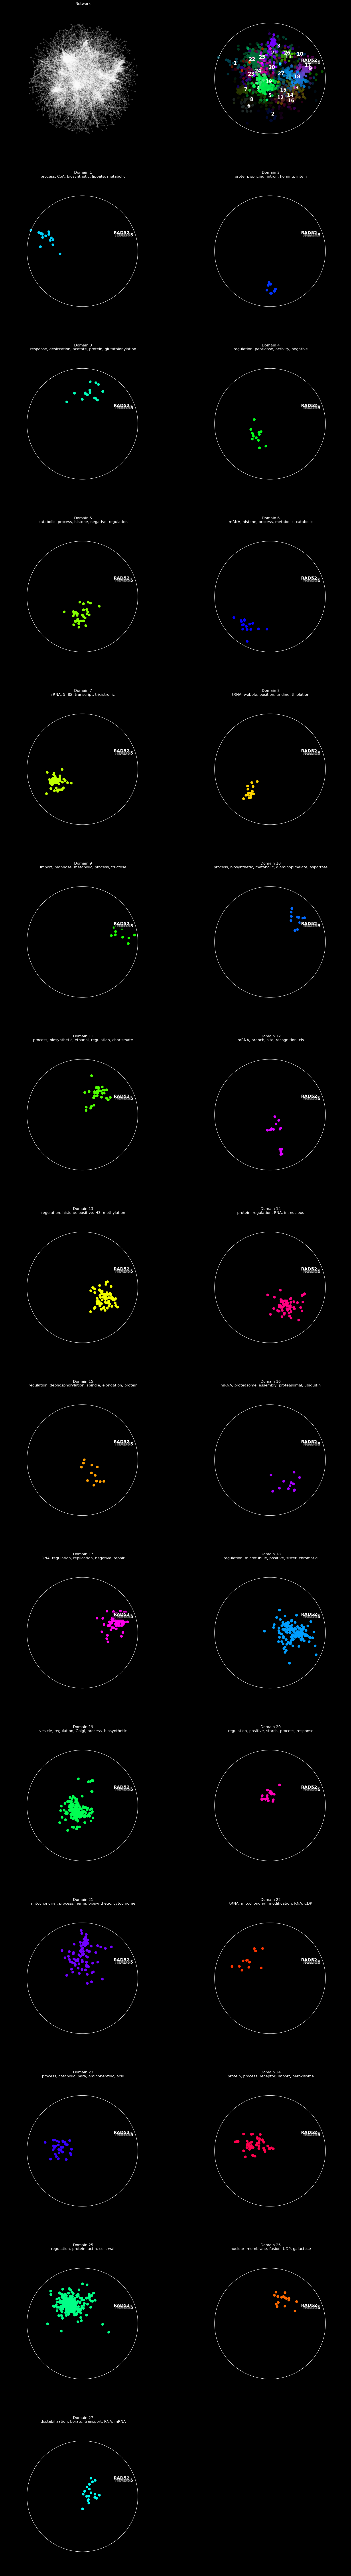

In [21]:
sf.plot_composite_network(show_each_domain=True, labels=['RAD54','RAD57','RAD55','RAD52'])

In [22]:
sf.print_output_files(output_dir='./')

In [23]:
sf.save(output_dir='./')